In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# assign meaningful column names to easily access them (rename column names)
seen_movie_col = 'Have you seen any of the 6 films in the Star Wars franchise?'
starwars_fan_col = 'Do you consider yourself to be a fan of the Star Wars film franchise?'
which_seen_col = 'Which of the following Star Wars films have you seen? Please select all that apply.'
rank_col = 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.'
favourable_col = 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.'
shot_first_col = 'Which character shot first?'
familiar_exp_universe_col = 'Are you familiar with the Expanded Universe?'
fan_of_exp_universe_col = 'Do you consider yourself to be a fan of the Expanded Universe?æ'
fan_of_startrek_col = 'Do you consider yourself to be a fan of the Star Trek franchise?'
response_col = 'Response'

movie = ['Star Wars: Episode I  The Phantom Menace','Star Wars: Episode II  Attack of the Clones','Star Wars: Episode III  Revenge of the Sith','Star Wars: Episode IV  A New Hope','Star Wars: Episode V The Empire Strikes Back','Star Wars: Episode VI Return of the Jedi']
characters = ['Han Solo','Luke Skywalker','Princess Leia Organa','Anakin Skywalker','Obi Wan Kenobi','Emperor Palpatine','Darth Vader','Lando Calrissian','Boba Fett','C-3P0','R2 D2','Jar Jar Binks','Padme Amidala','Yoda']

# //////1.1

# Read the StarWars.csv 
starwars_df = pd.read_csv('StarWars.csv', header=[0,1], sep=',', encoding= 'unicode_escape', index_col=0)

# Set multiIndex columns for starwars data frame as in StarWars.csv first two rows are header
cols = pd.MultiIndex.from_tuples([(seen_movie_col,response_col),(starwars_fan_col,response_col), (which_seen_col,movie[0]),(which_seen_col,movie[1]),(which_seen_col,movie[2]),(which_seen_col,movie[3]),(which_seen_col,movie[4]),(which_seen_col,movie[5]), (rank_col,movie[0]),(rank_col,movie[1]),(rank_col,movie[2]),(rank_col,movie[3]),(rank_col,movie[4]),(rank_col,movie[5]),
(favourable_col,characters[0]),(favourable_col,characters[1]),(favourable_col,characters[2]),(favourable_col,characters[3]),(favourable_col,characters[4]),(favourable_col,characters[5]),(favourable_col,characters[6]),(favourable_col,characters[7]),(favourable_col,characters[8]),(favourable_col,characters[9]),(favourable_col,characters[10]),(favourable_col,characters[11]),(favourable_col,characters[12]),(favourable_col,characters[13]),
(shot_first_col,response_col) , (familiar_exp_universe_col,response_col), (fan_of_exp_universe_col,response_col), (fan_of_startrek_col,response_col), ('Gender',response_col), ('Age',response_col), ('Household Income',response_col) , ('Education',response_col), ('Location',response_col)])

# Assign the multiIndex columns to the starwars dataframe
starwars_df.columns = cols

# //////1.2

yes_no_category = ['YES', 'NO']
movie_category = np.append(np.char.upper(movie), 'NOT WATCHED')
rank_category = [1, 2, 3, 4, 5, 6]
characters_category = ['VERY FAVORABLY', 'SOMEWHAT FAVORABLY', 'NEITHER FAVORABLY NOR UNFAVORABLY (NEUTRAL)',
           'SOMEWHAT UNFAVORABLY', 'VERY UNFAVORABLY', 'UNFAMILIAR (N/A)']
age_category = ['18-29','30-44', '45-60', '> 60', 'PREFER NOT TO ANSWER']
income_category = ['$0 - $24,999', '$25,000 - $49,999', '$50,000 - $99,999', '$100,000 - $149,999', '$150,000+']
gender_category = ['FEMALE', 'MALE', 'PREFER NOT TO ANSWER']

def assignAppropDtypes():
    # create an array of columns for which 'category' data type can be used 
    # the following columns have limited no of unique string values
    cols_to_convert_in_category = [seen_movie_col, starwars_fan_col, familiar_exp_universe_col, fan_of_exp_universe_col,
                               fan_of_startrek_col, shot_first_col, 'Education', 'Location', 'Gender']

    # loop through the columns array and convert the data type from 'object' to 'category' 
    for column in cols_to_convert_in_category:
        starwars_df[(column,response_col)] = starwars_df[(column,response_col)].astype('category')
    for single_movie in movie:
        starwars_df[(which_seen_col,single_movie)] = starwars_df[(which_seen_col,single_movie)].astype(pd.api.types.CategoricalDtype(categories=movie_category))                                                                                                   

    # ordered categories

    #for single_movie in movie:
        #starwars_df[(rank_col,single_movie)] = starwars_df[(rank_col,single_movie)].astype(pd.api.types.CategoricalDtype(categories=rank_category, ordered=True))
    for character in characters:
        starwars_df[(favourable_col,character)] = starwars_df[(favourable_col,character)].astype(pd.api.types.CategoricalDtype(categories=characters_category, ordered=True))

    starwars_df[('Age',response_col)] = starwars_df[('Age',response_col)].astype(pd.api.types.CategoricalDtype(categories=age_category, ordered=True))
    starwars_df[('Household Income', response_col)] = starwars_df[('Household Income', response_col)].astype(pd.api.types.CategoricalDtype(categories=income_category, ordered=True))

# //////1.3

# Remove Female/Male typos from Gender column
female_typo_mask = (starwars_df[('Gender',response_col)] == 'F') | (starwars_df[('Gender',response_col)] == 'female')
male_typo_mask = (starwars_df[('Gender',response_col)] == 'male')
starwars_df.loc[female_typo_mask, ('Gender',response_col)] = 'Female'
starwars_df.loc[male_typo_mask, ('Gender',response_col)] = 'Male'

# Function to remove the Yes/No typos
def rmv_yes_no_typos(column_name):
    yes_typo_mask = (starwars_df[(column_name,response_col)] == 'Yess') | (starwars_df[(column_name,response_col)] == 'yes') | (starwars_df[(column_name,response_col)] == 'Yes ')
    no_typo_mask = (starwars_df[(column_name,response_col)] == 'no ') | (starwars_df[(column_name,response_col)] == 'Noo') 
    starwars_df.loc[yes_typo_mask, (column_name,response_col)] = 'Yes'                                
    starwars_df.loc[no_typo_mask,(column_name,response_col)] = 'No'

# Remove Yes/No typos from the following columns  
rmv_yes_no_typos(starwars_fan_col)
rmv_yes_no_typos(fan_of_exp_universe_col)
rmv_yes_no_typos(fan_of_startrek_col)

# //////1.4

# Remove whitespaces if any from the starwars_df
starwars_df = starwars_df.applymap(lambda column:column.strip() if type(column) == str else column)

# //////1.5

# Convert starwars_df's data to uppercase for String type columns
starwars_df = starwars_df.applymap(lambda column:column.upper() if type(column) == str else column)


# //////1.6

# Assigning mode of the 'Age' column to the invalid age values
starwars_df.loc[ ~starwars_df[('Age', response_col)].isin(age_category) & starwars_df[('Age', response_col)].notnull(), ('Age', response_col) ] = starwars_df[('Age', response_col)].mode().iloc[0]

# Call the function assignAppropDtypes() to assign proper data types to 
# the columns because after using upper() the data type of the columns changes to object
assignAppropDtypes()

# //////1.7

# create an array of columns in which 'PREFER NOT TO ANSWER' category is to be added to fill NaN values 
columns_tofillna = ['Gender', 'Household Income', 'Education', 'Location']
# fill the NaN values with the added category
for column in columns_tofillna:
    starwars_df[(column,response_col)] = starwars_df[(column,response_col)].cat.add_categories("PREFER NOT TO ANSWER")
    starwars_df[(column,response_col)].fillna("PREFER NOT TO ANSWER", inplace=True)

# Make two copies of data frame based on if the person has watched any of the Star war movie or not
not_watched_movie_df = starwars_df.loc[starwars_df[(seen_movie_col,response_col)] == 'NO', ].copy()
watched_movie_df = starwars_df.loc[starwars_df[(seen_movie_col,response_col)] == 'YES', ].copy()

# Remove the observations where there are null values for 'Are you a fan of starwars' as all the attributes have null values in it
watched_movie_df.drop( watched_movie_df[watched_movie_df[(starwars_fan_col,response_col)].isnull()].index, inplace=True)

# Replacing missing values column by column

for single_movie in movie:
    watched_movie_df[(which_seen_col, single_movie)].fillna('NOT WATCHED', inplace=True)

for single_movie in movie: # only movie 3 has one null value
    watched_movie_df[(rank_col, single_movie)].fillna(watched_movie_df[(rank_col, single_movie)].mode().iloc[0], inplace=True)
    
for character in characters: 
    watched_movie_df[(favourable_col, character)].fillna(watched_movie_df[(favourable_col, character)].mode().iloc[0], inplace=True)

watched_movie_df[(shot_first_col,response_col)].fillna("I DON'T UNDERSTAND THIS QUESTION", inplace=True)

# create an array of columns in which 'I DON'T UNDERSTAND THIS QUESTION' category is to be added to fill NaN values
columns_tofillna = [familiar_exp_universe_col, fan_of_exp_universe_col, fan_of_startrek_col]
# fill the NaN values with the added category
for column in columns_tofillna:
    watched_movie_df[(column,response_col)] = watched_movie_df[(column,response_col)].cat.add_categories("I DON'T UNDERSTAND THIS QUESTION")
    watched_movie_df[(column,response_col)].fillna("I DON'T UNDERSTAND THIS QUESTION", inplace=True)



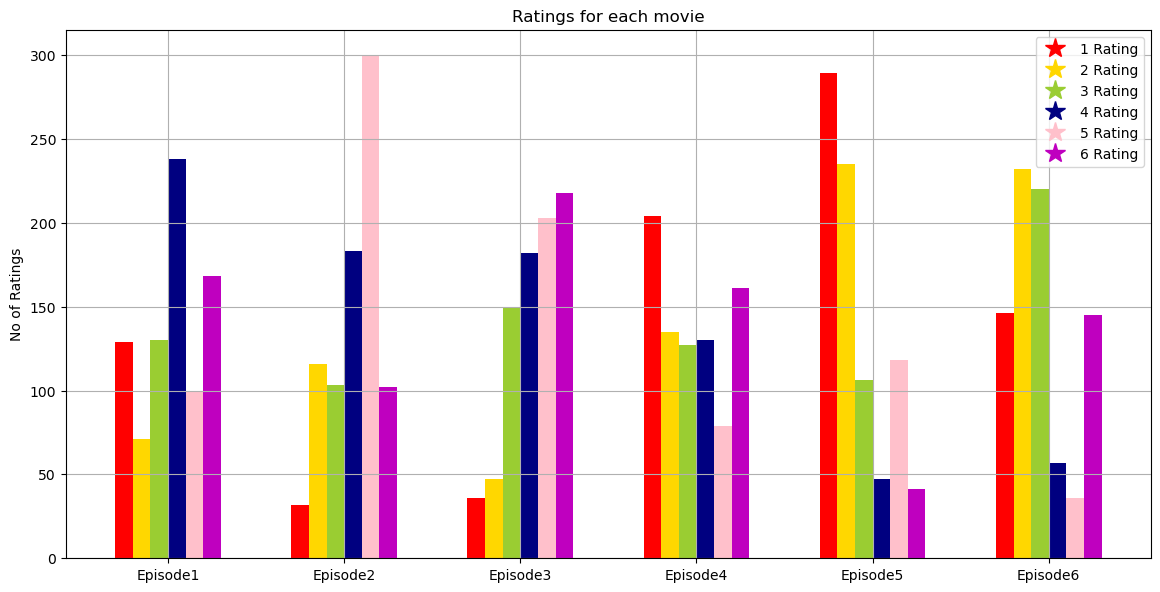

In [2]:
# ////// Task 2

# //////2.1

movie_rating_df = pd.DataFrame()
for single_movie in movie:
    movie_rating_df[single_movie] = watched_movie_df.sort_values((rank_col,single_movie))[(rank_col, single_movie)].value_counts(sort=False)

fig, axes = plt.subplots(1, 1, figsize=(14, 7), dpi=100)

colors = ['red', 'gold', 'yellowgreen', 'navy', 'pink', 'm']
x_labels = ['Episode1', 'Episode2', 'Episode3', 'Episode4', 'Episode5', 'Episode6']
legend_labels = ['1 Rating', '2 Rating', '3 Rating', '4 Rating', '5 Rating', '6 Rating']
bar_width = 0.1
bar_idx = list(range(len(movie)))

# Grouped bar chart
axes.bar(
    bar_idx,
    movie_rating_df.iloc[0] ,
    bar_width, color=colors[0], label='1 Rating')

axes.bar(
    [idx + (bar_width) for idx in bar_idx],
    movie_rating_df.iloc[1] ,
    bar_width, color=colors[1], label='2 Rating')

axes.bar(
    [idx + (2*bar_width) for idx in bar_idx],
    movie_rating_df.iloc[2] ,
    bar_width, color=colors[2], label='3 Rating')

axes.bar(
    [idx + (3*bar_width) for idx in bar_idx],
    movie_rating_df.iloc[3] ,
    bar_width, color=colors[3], label='4 Rating')

axes.bar(
    [idx + (4*bar_width) for idx in bar_idx],
    movie_rating_df.iloc[4] ,
    bar_width, color=colors[4], label='5 Rating')

axes.bar(
    [idx + (5*bar_width) for idx in bar_idx],
    movie_rating_df.iloc[5] ,
    bar_width, color=colors[5], label='6 Rating')

# Making X axis ticks modifications
axes.set_xticks([idx + (2.5*bar_width) for idx in bar_idx])
axes.set_xticklabels(x_labels)
# Setting Y axis label
axes.set_ylabel('No of Ratings')
# Setting title
axes.set_title('Ratings for each movie')

legend_marker = [Line2D([],[],marker='*', color=colors[i], linestyle = 'None', markersize=15, label= legend_labels[i]) for i in range(len(colors))]

plt.legend(handles = legend_marker, loc= 'upper right')
plt.grid()

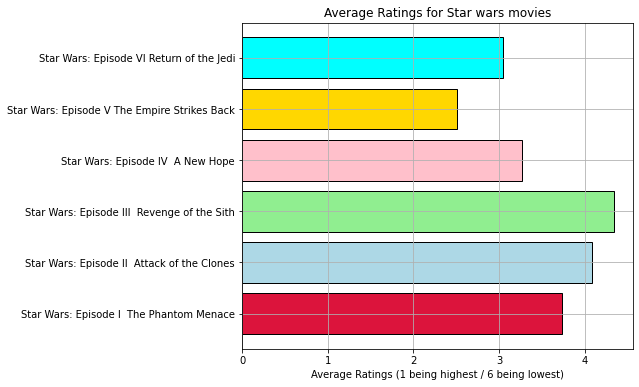

In [3]:
average_rating_array = np.array([])
for single_movie in movie:
    average_rating_array = np.append(average_rating_array,watched_movie_df[(rank_col, single_movie)].mean())

colors = ['crimson','lightblue','lightgreen','pink', 'gold', 'cyan']

fig, axes = plt.subplots(1, 1, figsize=(7, 6))
axes.barh(movie, pd.Series(average_rating_array),label= [movie[i] for i in range(len(movie))], color=colors, edgecolor='black')

# setting X and Y axis label and title
axes.set_xlabel('Average Ratings (1 being highest / 6 being lowest)')
axes.set_xticklabels(range(6))
axes.set_title('Average Ratings for Star wars movies')
plt.grid()

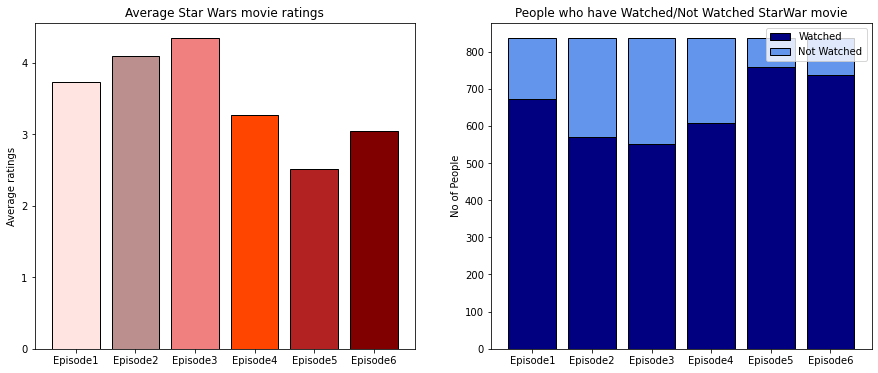

In [4]:
# Task 2.2: Relationships between columns

# Relationship between 'Rank the movies' column and 'Select the movies that you have seen'

average_rating_array = np.array([])
watched_movie_count = np.array([])
notwatched_movie_count = np.array([])

for single_movie in movie:
    average_rating_array = np.append(average_rating_array,watched_movie_df[(rank_col, single_movie)].mean())
    watch_count = max(watched_movie_df[(which_seen_col, single_movie)].value_counts(dropna=False))
    watched_movie_count = np.append(watched_movie_count, watch_count)
    notwatched_movie_count = np.append(notwatched_movie_count, len(watched_movie_df) - watch_count)

colors = ['mistyrose', 'rosybrown','lightcoral','orangered','firebrick', 'maroon']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].bar(x_labels, pd.Series(average_rating_array),label= [movie[i] for i in range(len(movie))], color=colors, edgecolor='black')
axes[0].set_title("Average Star Wars movie ratings")
axes[0].set_ylabel("Average ratings")

axes[1].bar(x_labels, pd.Series(watched_movie_count),label= 'Watched', color='navy', edgecolor='black')
axes[1].bar(x_labels, pd.Series(notwatched_movie_count),label= 'Not Watched', bottom=watched_movie_count,color='cornflowerblue', edgecolor='black')
axes[1].set_title("People who have Watched/Not Watched StarWar movie")
axes[1].set_ylabel("No of People")
plt.legend()


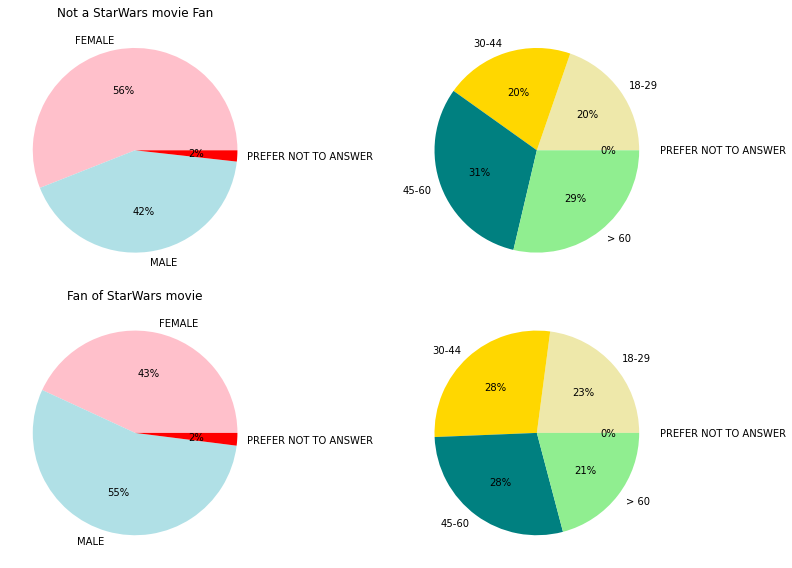

In [48]:
# Relation between 'Are you a fan of starwars movie' and 'Gender' & 'Age' column

age_colors = ['palegoldenrod','gold','teal','lightgreen','red']
gender_colors = ['pink', 'powderblue', 'red']

not_fan_age_perc = watched_movie_df[watched_movie_df[(starwars_fan_col,response_col)] == 'NO'][('Age', response_col)].value_counts(sort=False,normalize=True)
not_fan_gender_perc = watched_movie_df[watched_movie_df[(starwars_fan_col,response_col)] == 'NO'][('Gender', response_col)].value_counts(sort=False,normalize=True)

fan_age_perc = watched_movie_df[watched_movie_df[(starwars_fan_col,response_col)] == 'YES'][('Age', response_col)].value_counts(sort=False,normalize=True)
fan_gender_perc = watched_movie_df[watched_movie_df[(starwars_fan_col,response_col)] == 'YES'][('Gender', response_col)].value_counts(sort=False,normalize=True)

fig,axes = plt.subplots(2,2, figsize=(12,8))
axes[0][0].pie(not_fan_gender_perc, labels = gender_category,colors = gender_colors, autopct='%1.0f%%')
axes[0][0].set_title('Not a StarWars movie Fan')
axes[0][1].pie(not_fan_age_perc,labels = age_category,colors=age_colors, explode=(0,0,0,0,0.1), autopct='%1.0f%%')
axes[1][0].pie(fan_gender_perc, labels = gender_category ,colors = gender_colors, autopct='%1.0f%%')
axes[1][0].set_title('Fan of StarWars movie')
axes[1][1].pie(fan_age_perc,labels = age_category,colors=age_colors, explode=(0,0,0,0,0.1), autopct='%1.0f%%')

plt.tight_layout()

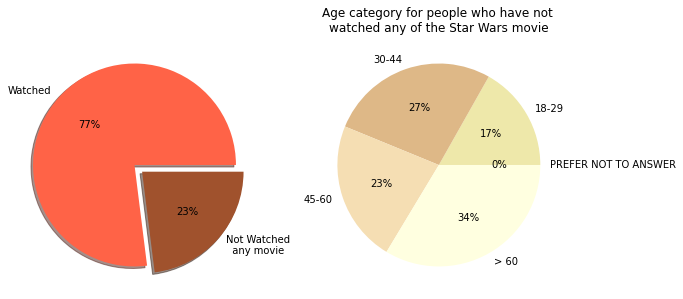

In [87]:
# Relation between People who have not watched any of the Star Wars movies and Age

not_watched_age_colors = ['palegoldenrod','burlywood','wheat','lightyellow','yellow']

fig,axes = plt.subplots(1,2, figsize=(10,10))
axes[0].pie([len(watched_movie_df), len(not_watched_movie_df)], labels=['Watched', 'Not Watched\n  any movie'],colors = ['tomato','sienna'], autopct='%1.0f%%', explode=(0,0.10), shadow = True)

axes[1].pie(not_watched_movie_df[('Age',response_col)].value_counts(sort=False), labels = age_category, colors=not_watched_age_colors, autopct='%1.0f%%')
axes[1].set_title('Age category for people who have not \nwatched any of the Star Wars movie')
plt.show()

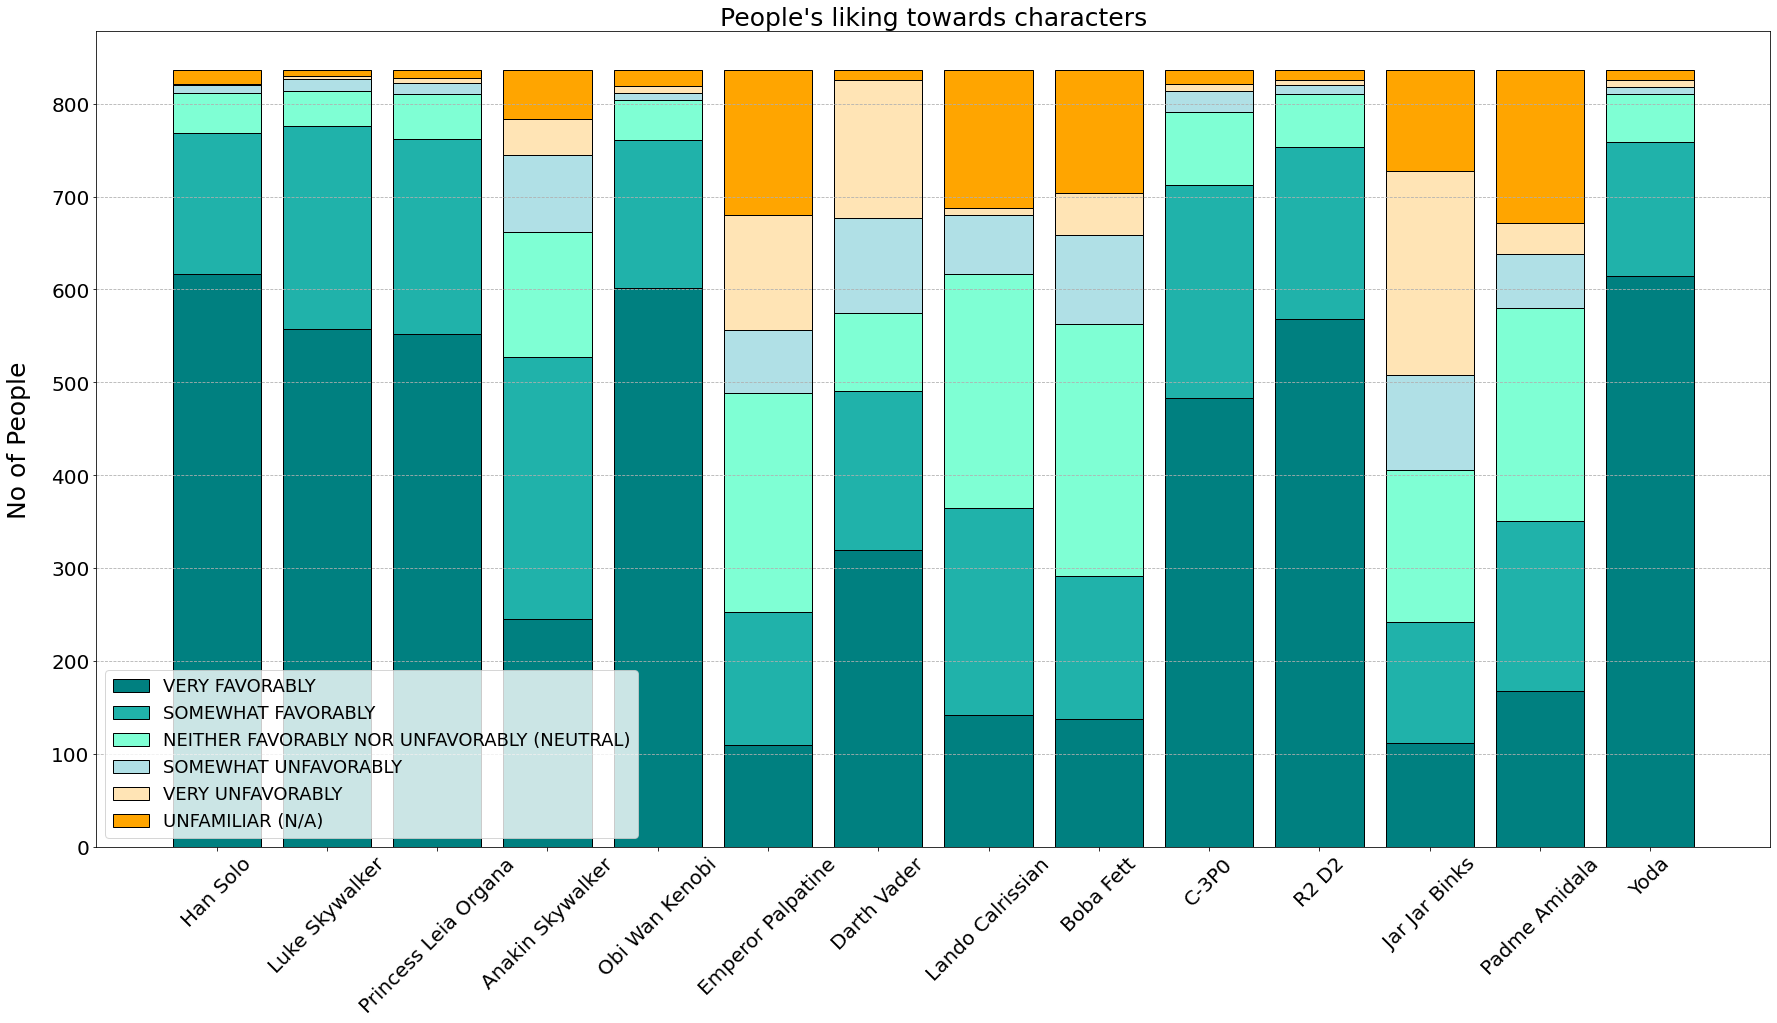

In [172]:
character_rating_count_df = pd.DataFrame()

for character in characters:
    character_rating_count_df[character] = watched_movie_df[(favourable_col, character)].value_counts(sort=False)

colors = ['teal', 'lightseagreen', 'aquamarine', 'powderblue', 'moccasin','orange']
#colors = ['maroon', 'lightcoral', 'rosybrown', 'mistyrose','bisque', 'red']

fig,ax = plt.subplots(1,1, figsize=(30,15))

bottom0 = character_rating_count_df.iloc[0]
ax.bar(characters, bottom0, label= characters_category[0], color= colors[0], edgecolor='black')
bottom1 = character_rating_count_df.iloc[1]
ax.bar(characters, bottom1, label= characters_category[1], bottom = bottom0, color=colors[1], edgecolor='black')
bottom2 = character_rating_count_df.iloc[2]
ax.bar(characters, bottom2, label= characters_category[2], bottom = [i+j for i,j in zip(bottom0, bottom1)], color=colors[2], edgecolor='black')
bottom3 = character_rating_count_df.iloc[3]
ax.bar(characters, bottom3, label= characters_category[3], bottom = [i+j+k for i,j,k in zip(bottom0, bottom1, bottom2)], color=colors[3], edgecolor='black')
bottom4 = character_rating_count_df.iloc[4]
ax.bar(characters, bottom4, label= characters_category[4], bottom = [i+j+k+l for i,j,k,l in zip(bottom0, bottom1, bottom2, bottom3)], color=colors[4], edgecolor='black')
bottom5 = character_rating_count_df.iloc[5]
ax.bar(characters, bottom5, label= characters_category[5], bottom = [i+j+k+l+m for i,j,k,l,m in zip(bottom0, bottom1, bottom2, bottom3, bottom4)], color=colors[5], edgecolor='black')

ax.set_title("People's liking towards characters", fontsize=25)
ax.set_ylabel("No of People", fontsize=25, labelpad=20)
ax.tick_params(axis='x', labelsize=20, rotation=45)
ax.tick_params(axis='y', labelsize=20)
plt.legend(loc='lower left', prop= {'size':18})
plt.grid(axis='y', linestyle = '--')